# Day 3 - Task 1: Basic Text Classification Project

**Author:** Ayush Singh  
**Dataset:** SMS Spam Collection  

## Objective
Build a spam detection model using:
- Naive Bayes
- Logistic Regression
- Support Vector Machine

Compare performance using:
- CountVectorizer
- TF-IDF


In [2]:
# Import libraries

import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

print("Libraries loaded successfully")


Libraries loaded successfully


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load dataset

df = pd.read_csv("spam.csv", encoding="latin-1")

df = df[['v1','v2']]
df.columns = ['label','text']

df['label'] = df['label'].map({'ham':0,'spam':1})

print("Dataset shape:", df.shape)

df.head()


Dataset shape: (5572, 2)


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Text cleaning

stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()

    text = re.sub(f"[{string.punctuation}]", "", text)

    words = text.split()

    words = [word for word in words if word not in stop_words]

    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

df.head()


,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [5]:
# Split dataset

X = df['clean_text']
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 4457
Testing samples: 1115


In [6]:
# CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print("CountVectorizer shape:", X_train_count.shape)


CountVectorizer shape: (4457, 5000)


In [7]:
# TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (4457, 5000)


In [8]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC()
}

results = {}

for name, model in models.items():

    print("\n============================")
    print("Model:", name)

    model.fit(X_train_tfidf, y_train)

    pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, pred)

    results[name] = accuracy

    print("Accuracy:", accuracy)

    print("\nClassification Report:")
    print(classification_report(y_test, pred))



Model: Naive Bayes
Accuracy: 0.9695067264573991

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Model: Logistic Regression
Accuracy: 0.9587443946188341

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.70      0.82       150

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Model: SVM
Accuracy: 0.979372197309417

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       

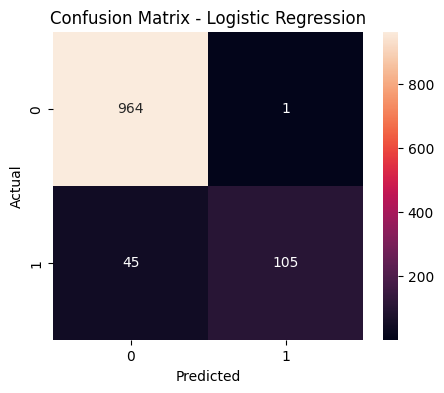

In [9]:
# Confusion Matrix for Logistic Regression

model = LogisticRegression(max_iter=2000)

model.fit(X_train_tfidf, y_train)

pred = model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


In [10]:
print("Final Model Comparison:\n")

for model, acc in results.items():
    print(model, ":", acc)


Final Model Comparison:

Naive Bayes : 0.9695067264573991
Logistic Regression : 0.9587443946188341
SVM : 0.979372197309417


In [12]:
# Important words for spam (FIXED)

# Create and train Logistic Regression model again
lr_model = LogisticRegression(max_iter=2000)

lr_model.fit(X_train_tfidf, y_train)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients
coefficients = lr_model.coef_[0]

# Get top spam words
top_spam = np.argsort(coefficients)[-10:]

print("Top spam words:\n")

for i in top_spam:
    print(feature_names[i])


Top spam words:

new
prize
reply
call
text
stop
mobile
claim
free
txt


In [14]:
# Interactive Spam Detection Test

def predict_spam(message):

    clean = clean_text(message)

    vec = tfidf_vectorizer.transform([clean])

    prediction = lr_model.predict(vec)[0]

    if prediction == 1:
        return "SPAM"
    else:
        return "HAM"


# Test examples
print("Test 1:", predict_spam("free prize win money now"))
print("Test 2:", predict_spam("hello how are you"))


Test 1: SPAM
Test 2: HAM


In [15]:
# BONUS: Compare CountVectorizer vs TF-IDF

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000)
}

print("Using CountVectorizer:\n")

for name, clf in models.items():

    clf.fit(X_train_count, y_train)

    pred = clf.predict(X_test_count)

    print(name, "Accuracy:",
          accuracy_score(y_test, pred))


print("\nUsing TF-IDF:\n")

for name, clf in models.items():

    clf.fit(X_train_tfidf, y_train)

    pred = clf.predict(X_test_tfidf)

    print(name, "Accuracy:",
          accuracy_score(y_test, pred))


Using CountVectorizer:

Naive Bayes Accuracy: 0.9811659192825112
Logistic Regression Accuracy: 0.9766816143497757

Using TF-IDF:

Naive Bayes Accuracy: 0.9695067264573991
Logistic Regression Accuracy: 0.9587443946188341


In [16]:
lr_model = LogisticRegression(max_iter=2000)

lr_model.fit(X_train_tfidf, y_train)

feature_names = tfidf_vectorizer.get_feature_names_out()

coefficients = lr_model.coef_[0]

top_spam = np.argsort(coefficients)[-10:]

print("Top spam words:")

for i in top_spam:
    print(feature_names[i])


Top spam words:
new
prize
reply
call
text
stop
mobile
claim
free
txt
